In [1]:
import numpy as np
import pandas as pd
from phate import PHATE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from bed_reader import open_bed

bed = open_bed('/home/shussain/popviz/genomic_data/hgdp_QC_IMP.bed').read()

In [3]:
dist = np.loadtxt(
    "/home/shussain/popviz/experiments/using_distance_matrix/hgdp_distance_matrix")
dist

array([[  0.        , 598.87060547, 597.63531494, ..., 736.52832031,
        735.51342773, 737.4083252 ],
       [598.87060547,   0.        , 601.29193115, ..., 737.17974854,
        736.324646  , 739.10015869],
       [597.63531494, 601.29193115,   0.        , ..., 739.1697998 ,
        736.57720947, 740.34246826],
       ...,
       [736.52832031, 737.17974854, 739.1697998 , ...,   0.        ,
        629.86029053, 684.13085938],
       [735.51342773, 736.324646  , 736.57720947, ..., 629.86029053,
          0.        , 684.19805908],
       [737.4083252 , 739.10015869, 740.34246826, ..., 684.13085938,
        684.19805908,   0.        ]])

In [4]:
from sklearn.neighbors import kneighbors_graph

arr = kneighbors_graph(dist, 5, metric="precomputed", mode="distance").toarray()

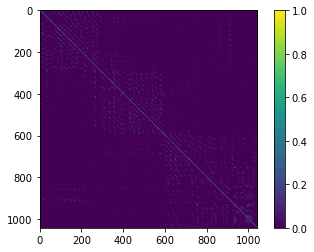

In [5]:
plt.imshow(arr == dist)
plt.colorbar()

In [6]:
arr[0, np.argsort(dist[0, :])][:10]

array([  0.        , 515.49780273, 562.45977783, 591.30871582,
       591.8817749 , 592.41790771,   0.        ,   0.        ,
         0.        ,   0.        ])

In [7]:
np.sum(dist, axis=0) 

array([753053.30224609, 754217.68768311, 755139.85784912, ...,
       699309.88262939, 699685.43676758, 690085.95007324])

In [8]:
 np.sum(dist, axis=1)

array([753053.30224609, 754217.68768311, 755139.85784912, ...,
       699309.88262939, 699685.43676758, 690085.95007324])

In [9]:
arr == dist

array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True]])

In [10]:
from gtda.homology import VietorisRipsPersistence as VRP

vrp = VRP(metric="precomputed", homology_dimensions=(0, 1, 2))

In [11]:
transformed = vrp.fit_transform(dist[None, :, :])

In [12]:
transformed.shape


(1, 1992, 3)

In [13]:
!rsyn

/bin/sh: 1: rsyn: not found


In [14]:
from gtda.plotting import plot_diagram

i = 0
fig = plot_diagram(transformed[i])

In [15]:
fig.write_html("asdas.html")

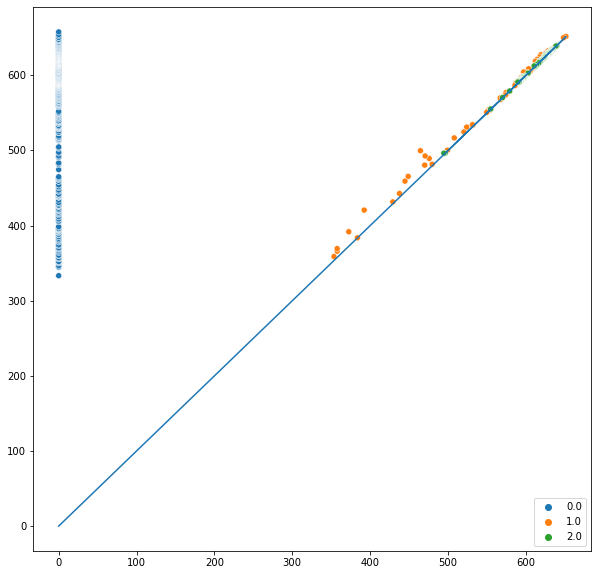

In [16]:
import seaborn as sns

plt.figure(figsize=(10, 10))

sns.scatterplot(x=transformed[0, :, 0], 
                y=transformed[0, :, 1], 
                hue=[f"{s}" for s in transformed[0, :, 2]])

plt.plot(transformed[0, :, 0], transformed[0, :, 0])

In [20]:
pers_1kgp = np.loadtxt("persistance.txt")
pers_1kgp

array([[0.00000000e+00, 1.38378247e+03, 0.00000000e+00],
       [0.00000000e+00, 1.41953931e+03, 0.00000000e+00],
       [0.00000000e+00, 1.43740491e+03, 0.00000000e+00],
       ...,
       [1.84908923e+03, 1.85378662e+03, 1.00000000e+00],
       [1.83907043e+03, 1.83963806e+03, 1.00000000e+00],
       [1.83456287e+03, 1.83963806e+03, 1.00000000e+00]])

In [22]:
for feature in pers_1kgp:
    

[   0.        1383.7824707    0.       ]
[   0.         1419.53930664    0.        ]
[   0.         1437.40490723    0.        ]
[   0.         1440.83520508    0.        ]
[   0.         1445.87756348    0.        ]
[   0.         1564.72070312    0.        ]
[   0.         1597.13183594    0.        ]
[   0.         1597.84326172    0.        ]
[   0.         1599.52587891    0.        ]
[   0.         1606.30200195    0.        ]
[   0.         1606.68762207    0.        ]
[   0.         1635.76257324    0.        ]
[   0.        1761.9954834    0.       ]
[   0.       1769.109375    0.      ]
[   0.        1797.1619873    0.       ]
[   0.         1810.59802246    0.        ]
[   0.         1821.39978027    0.        ]
[   0.         1822.65881348    0.        ]
[   0.         1824.42346191    0.        ]
[   0.         1825.01342773    0.        ]
[   0.         1825.84912109    0.        ]
[   0.         1827.89819336    0.        ]
[   0.         1834.21069336    0.        ]
[  

In [21]:
pers_1kgp.shape

(6543, 3)

In [18]:
def make_point_clouds(n_samples_per_shape: int, n_points: int, noise: float):
    """Make point clouds for circles, spheres, and tori with random noise.
    """
    circle_point_clouds = [
        np.asarray(
            [
                [np.sin(t) + noise * (np.random.rand(1)[0] - 0.5), np.cos(t) + noise * (np.random.rand(1)[0] - 0.5), 0]
                for t in range((n_points ** 2))
            ]
        )
        for kk in range(n_samples_per_shape)
    ]
    # label circles with 0
    circle_labels = np.zeros(n_samples_per_shape)

    sphere_point_clouds = [
        np.asarray(
            [
                [
                    np.cos(s) * np.cos(t) + noise * (np.random.rand(1)[0] - 0.5),
                    np.cos(s) * np.sin(t) + noise * (np.random.rand(1)[0] - 0.5),
                    np.sin(s) + noise * (np.random.rand(1)[0] - 0.5),
                ]
                for t in range(n_points)
                for s in range(n_points)
            ]
        )
        for kk in range(n_samples_per_shape)
    ]
    # label spheres with 1
    sphere_labels = np.ones(n_samples_per_shape)

    torus_point_clouds = [
        np.asarray(
            [
                [
                    (2 + np.cos(s)) * np.cos(t) + noise * (np.random.rand(1)[0] - 0.5),
                    (2 + np.cos(s)) * np.sin(t) + noise * (np.random.rand(1)[0] - 0.5),
                    np.sin(s) + noise * (np.random.rand(1)[0] - 0.5),
                ]
                for t in range(n_points)
                for s in range(n_points)
            ]
        )
        for kk in range(n_samples_per_shape)
    ]
    # label tori with 2
    torus_labels = 2 * np.ones(n_samples_per_shape)

    point_clouds = np.concatenate((circle_point_clouds, sphere_point_clouds, torus_point_clouds))
    labels = np.concatenate((circle_labels, sphere_labels, torus_labels))

    return point_clouds, labels

n_samples_per_class = 10
point_clouds, labels = make_point_clouds(n_samples_per_class, 10, 0.1)
point_clouds.shape
print(f"There are {point_clouds.shape[0]} point clouds in {point_clouds.shape[2]} dimensions, "
      f"each with {point_clouds.shape[1]} points.")

There are 30 point clouds in 3 dimensions, each with 100 points.


In [19]:
point_clouds.shape

(30, 100, 3)